# Mapa Térmico de Densidade de Energia por km²

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import seaborn as sns

In [4]:
# estado_sp = gpd.read_file(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\SP_Municipios_2022.shp")
# enel_sp = gpd.read_file("SP_BDGD_ENEL.shp") #conj no bdgd
# ponnot = gpd.read_file(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\PONNOT.shp", low_memory=False)

# ucat = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UCAT_tab.csv")
# ucmt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UCMT_tab.csv")
# ucbt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UCBT_tab.csv", low_memory=False)

# ugat = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UGAT_tab.csv", sep=",")
# ugmt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UGMT_tab.csv", sep=";")
# ugbt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UGBT_tab.csv", sep=";")

# sub = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\SUB.csv", sep=";")
# pt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\PT.csv", sep=",")
# pnt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\PNT.csv", sep=",")

In [5]:
estado_sp = gpd.read_file(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\SP_Municipios_2022.shp")
enel_sp = gpd.read_file("SP_BDGD_ENEL.shp") #conj no bdgd
ponnot = gpd.read_file(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PONNOT.shp", low_memory=False)

ucat = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCAT_tab.csv")
ucmt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCMT_tab.csv")
ucbt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCBT_tab.csv", low_memory=False)

ugat = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGAT_tab.csv", sep=",")
ugmt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGMT_tab.csv", sep=";")
ugbt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGBT_tab.csv", sep=";")

sub = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\SUB.csv", sep=";")
pt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PT.csv", sep=",")
pnt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PNT.csv", sep=",")

In [27]:
def map_conj(mapa):
    ene_conj = []
    ger_conj = []
    for conjunto in mapa.COD_ID:
        ene_conj.append(ucbt[ucbt.CONJ == int(conjunto)]["ENE_01"].sum() + ucmt[ucmt.CONJ == int(conjunto)]["ENE_01"].sum() + ucat[ucat.CONJ == int(conjunto)]["ENE_P_01"].sum() + ucat[ucat.CONJ == int(conjunto)]["ENE_F_01"].sum())
        ger_conj.append(ugbt[ugbt.CONJ == int(conjunto)]["ENE_01"].sum() + ugmt[ugmt.CONJ == int(conjunto)]["ENE_01"].sum() + ugat[ugat.CONJ == int(conjunto)]["ENE_P_01"].sum() + ugat[ugat.CONJ == int(conjunto)]["ENE_F_01"].sum())
    mapa["ENE_TOTAL_01"] = ene_conj
    mapa["DENSIDADE_LOAD"] = mapa["ENE_TOTAL_01"]/mapa["Shape_Area"]
    df_consumo = mapa[mapa["ENE_TOTAL_01"] != 0]
    mapa["GER_TOTAL_01"] = ger_conj
    mapa["DENSIDADE_GERACAO"] = mapa["GER_TOTAL_01"]/mapa["Shape_Area"]
    df_geracao = mapa[mapa["GER_TOTAL_01"] != 0]

    return df_consumo, df_geracao

def map_municipio(mapa):
    ene_conj = []
    ger_conj = []
    for conjunto in mapa.CD_MUN:
        ene_conj.append(ucbt[ucbt.MUN == int(conjunto)]["ENE_01"].sum() + ucmt[ucmt.MUN == int(conjunto)]["ENE_01"].sum() + ucat[ucat.MUN == int(conjunto)]["ENE_P_01"].sum() + ucat[ucat.MUN == int(conjunto)]["ENE_F_01"].sum())
        ger_conj.append(ugbt[ugbt.MUN == int(conjunto)]["ENE_01"].sum() + ugmt[ugmt.MUN == int(conjunto)]["ENE_01"].sum() + ugat[ugat.MUN == int(conjunto)]["ENE_P_01"].sum() + ugat[ugat.MUN == int(conjunto)]["ENE_F_01"].sum())
    mapa["ENE_TOTAL_01"] = ene_conj
    mapa["DENSIDADE_LOAD"] = mapa["ENE_TOTAL_01"]/mapa["AREA_KM2"]
    df_consumo = mapa[mapa["ENE_TOTAL_01"] != 0]
    mapa["GER_TOTAL_01"] = ger_conj
    mapa["DENSIDADE_GERACAO"] = mapa["GER_TOTAL_01"]/mapa["AREA_KM2"]
    df_geracao = mapa[mapa["GER_TOTAL_01"] != 0]

    return df_consumo, df_geracao

In [28]:
mapa_conj_consumo, mapa_conj_geracao = map_conj(enel_sp)

In [29]:
mapa_mun_consumo, mapa_mun_geracao = map_municipio(estado_sp)

<AxesSubplot: >

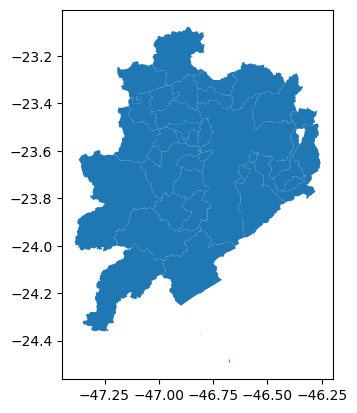

In [30]:
mapa_mun_consumo.plot()

<AxesSubplot: >

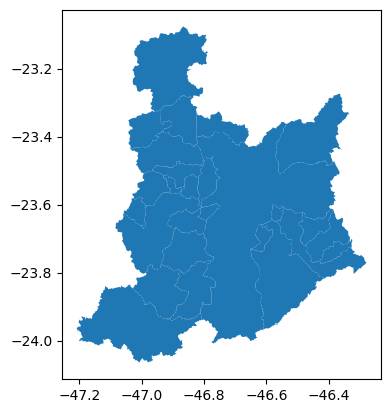

In [31]:
mapa_mun_geracao.plot()

In [32]:
len(estado_sp)

645

<AxesSubplot: >

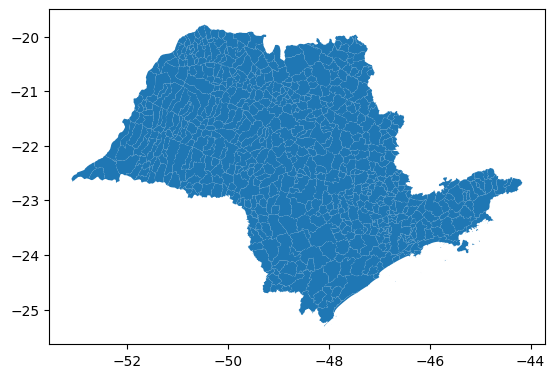

In [33]:
estado_sp.plot()

<AxesSubplot: >

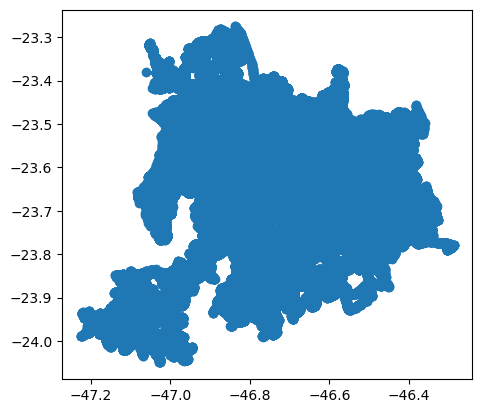

In [42]:
ponnot.plot()

<AxesSubplot: >

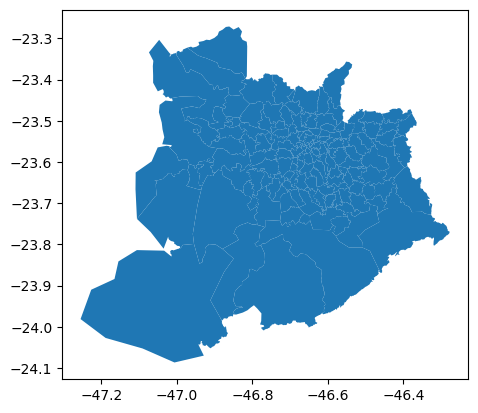

In [34]:
enel_sp.plot()

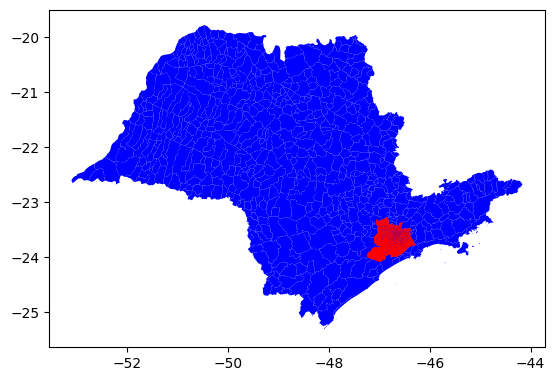

In [35]:
fig, ax = plt.subplots(1, 1)

estado_sp.plot(ax=ax, color='blue')  
enel_sp.plot(ax=ax, color='red')  

plt.show()


<AxesSubplot: >

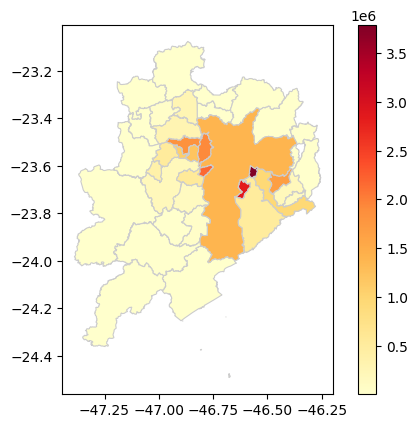

In [37]:
fig, ax = plt.subplots(1, 1)
mapa_mun_consumo.plot(column="DENSIDADE_LOAD", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

<AxesSubplot: >

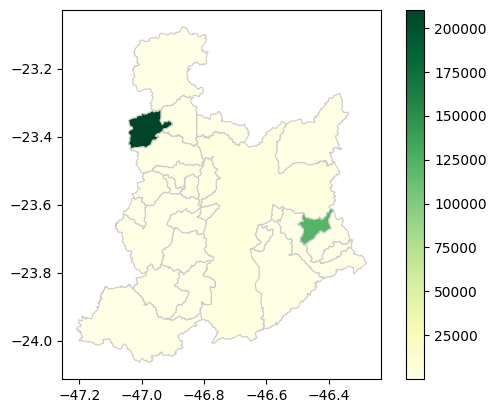

In [38]:
fig, ax = plt.subplots(1, 1)
mapa_mun_geracao.plot(column="DENSIDADE_GERACAO", cmap="YlGn", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

<AxesSubplot: >

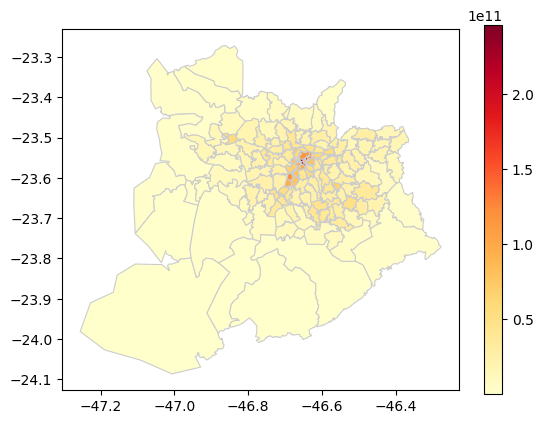

In [39]:
fig, ax = plt.subplots(1, 1)
mapa_conj_consumo.plot(column="DENSIDADE_LOAD", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

<AxesSubplot: >

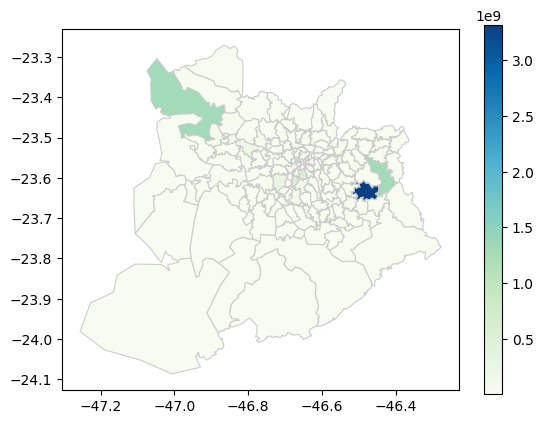

In [40]:
fig, ax = plt.subplots(1, 1)
mapa_conj_geracao.plot(column="DENSIDADE_GERACAO", cmap="GnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

In [41]:
x = ponnot.geometry.x
y = ponnot.geometry.y
plt.figure(figsize=(10, 10))
sns.kdeplot(x, y, cmap='viridis', fill=True)
plt.colorbar(label='Densidade')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Calor')
plt.show()

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x1000 with 0 Axes>

In [27]:
pontos_bt = ucbt.PN_CON.to_list()
ponnot_ucbt = ponnot[ponnot.COD_ID.isin(pontos_bt)]

In [30]:
ponnot_ucbt.COD_ID[0]

'99988'

In [43]:
print("teste")

teste
